In [1]:
# Functions Used for Simple Linear Regression (SLR) Analysis
# --------------------------------------------------------------
# This notebook provides the following operations:
# compute_b0() - Compute the y-intercept of the regression line
# compute_b1() - Compute the regression coefficient of the regression line
# compute_regression_line() - Compute and return the regression function
# print_regression_line() - Print the formula of the regression equation
# compute_s_xx() - Compute the sum of the squares of the difference between each x and the mean x value
# compute_s_xy() - Compute the sum of the product of the difference between x its means and the difference between y and its mean.
# compute_s_yy() - Compute the sum of the squares of the difference between each y and the mean y value
# compute_MSE() - Compute the mean squared error
# compute_SSE() - Compute the sum squared error
# comptute_SSR() - Compute the sum squared regression
# plot_data() - Plot the input data with or without regression line
# compute_CI_b1() - Compute the two-tailed confidence interval of b1
# compute_CI_b0() - Compute the two-tailed confidence interval of b0
# compute_R_squared() - Compute the coefficient of determination
# compute_x_i_squared() - Compute the sum squared of column x
# compute_y_i_squared() - Compute the sum squared of column y
# generate_ANOVA_table() - Generate the ANOVA table for SLR Analysis

In [2]:
import numpy as np, pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import math
import seaborn as sns

%matplotlib inline

In [3]:
def compute_regression_line(data):
    
    b0 = compute_b0(data)
    b1 = compute_b1(data)
    
    def hypothesis(x):
        return b0+b1*x
    return hypothesis

In [4]:
def print_regression_line(data):
    b0 = compute_b0(data)
    b1 = compute_b1(data)
    print("ŷ = " + str(b0) + " + (" + str(b1) + "*x)")

In [5]:
def compute_b0(data):
    cols = list(data.columns) # Name of the columns
    x_avg = np.mean(data[cols[0]]) # Average of column X 
    y_avg = np.mean(data[cols[1]]) # Average of column Y
    
    return y_avg-compute_b1(data)*x_avg

In [6]:
def compute_b1(data):
    s_xy = compute_s_xy(data)
    s_xx = compute_s_xx(data)
    return s_xy/s_xx

In [7]:
def compute_s_xy(data):
    cols = list(data.columns) # Name of the columns 
    x_avg = np.mean(data[cols[0]]) # Average of column X 
    y_avg = np.mean(data[cols[1]]) # Average of column Y
    
    return np.sum(Series.mul(data[cols[0]]-x_avg, data[cols[1]]-y_avg))    

In [8]:
def compute_s_xx(data):
    cols = list(data.columns) # Name of the columns
    x_avg = np.mean(data[cols[0]])
    return np.sum((data[cols[0]]-x_avg)**2)

In [9]:
def compute_s_yy(data):
    cols = list(data.columns) # Name of the columns
    y_avg = np.mean(data[cols[1]])
    return np.sum((data[cols[1]]-y_avg)**2)

In [10]:
def compute_MSE(data):
    return compute_SSE(data)/(len(data)-2)

In [11]:
def compute_SSE(data):
    cols = list(data.columns) # Name of the columns
    h = compute_regression_line(data)
    return np.sum((data[cols[1]]-h(data[cols[0]]))**2)

In [12]:
def compute_SSR(data):
    cols = list(data.columns) # Name of the columns
    h = compute_regression_line(data)
    y_avg = np.mean(data[cols[1]])
    return np.sum((h(data[cols[0]])-y_avg)**2)

In [13]:
def plot_data(data, regression):
    cols = list(data.columns)
    if (regression == True):
        plot = sns.lmplot(x=cols[0], y=cols[1], data=data, fit_reg=True)
    else:
        plot = sns.lmplot(x=cols[0], y=cols[1], data=data, fit_reg=False)

In [14]:
def compute_CI_b1(data, level):
    
    df = len(data)-2
    alpha = 1-level
    
    b1 = compute_b1(data)
    test_stat_val = stats.t.ppf((1-alpha)/2, df)
    mse = compute_MSE(data)
    s_xx = compute_s_xx(data)
    
    lower_bound = b1 - test_stat_val*math.sqrt(mse/s_xx)
    upper_bound = b1 + test_stat_val*math.sqrt(mse/s_xx)
    
    print("The Confidence Interval of b1 at alpha="+str(level*100)+"% is:")
    print("("+str(lower_bound)+", "+str(upper_bound)+")")

In [15]:
def compute_CI_b0(data, level):
    df = len(data)-2
    alpha = 1-level
    
    b0 = compute_b0(data)
    test_stat_val = -stats.t.ppf((alpha)/2, df)

    cols = list(data.columns)
    sum_x_squared = np.sum(data[cols[0]]**2)
    n = len(data)
    s_xx = compute_s_xx(data)
    s = math.sqrt(compute_MSE(data))
    
    lower_bound = b0 - test_stat_val*s*math.sqrt(sum_x_squared/(n*s_xx))
    upper_bound = b0 + test_stat_val*s*math.sqrt(sum_x_squared/(n*s_xx))
    
    print("The Confidence Interval of b1 at alpha="+str(level*100)+"% is:")
    print("("+str(lower_bound)+", "+str(upper_bound)+")")

In [16]:
def compute_R_squared(data):
    return 1-(compute_SSE(data)/compute_s_yy(data))

In [17]:
def compute_x_i_squared(data):
    return np.sum(data[list(data.columns)[0]]**2)

In [18]:
def compute_y_i_squared():
    return np.sum(data[list(data.columns)[1]]**2)

In [19]:
def generate_ANOVA_table(data):
    table = DataFrame(index=['Model(Regression)', 'Error (Residual)', 'Total'], columns=['SS', 'df', 'MS', 'F'])
    ssr = compute_SSR(data)
    sse = compute_SSE(data)
    sst = ssr+sse
    n = len(data)
    msr = ssr/1 # Since this is SLR, there's only 1 feature
    mse = compute_MSE(data)
    
    cols = list(table.columns)
    rows = list(table.index)
    
    table[cols[0]][rows[0]] = float(ssr)
    table[cols[0]][rows[1]] = float(sse)
    table[cols[0]][rows[2]] = float(sst)
    table[cols[1]][rows[0]] = 1
    table[cols[1]][rows[1]] = float(n-2)
    table[cols[1]][rows[2]] = float(n-1)
    table[cols[2]][rows[0]] = float(msr)
    table[cols[2]][rows[1]] = float(mse)
    table[cols[3]][rows[0]] = float(msr/mse)

    return table

In [20]:
# Load input data
input_data = DataFrame.from_csv('slr_ex_data4.csv', index_col=None)

None


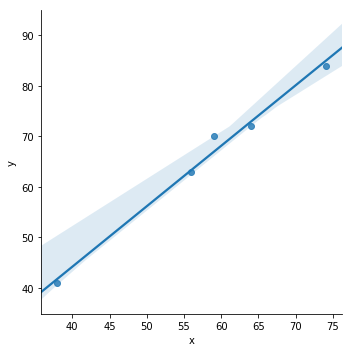

In [21]:
# Display the data plot
print(plot_data(input_data, True))

In [22]:
# Print ANOVA table
print(generate_ANOVA_table(input_data))

                        SS df       MS      F
Model(Regression)  998.215  1  998.215  254.1
Error (Residual)   11.7853  3  3.92843    NaN
Total                 1010  4      NaN    NaN


In [23]:
# Display regression fit line
compute_regression_line(input_data)(74)

84.91102181400687

In [24]:
# Display R squared value
print(str(compute_R_squared(input_data)*100) + "% of the variation can be explained by the fitted model")

98.83313819326823% of the variation can be explained by the fitted model


In [41]:
compute_CI_b0(input_data, 0.9)

The Confidence Interval of b1 at alpha=90.0% is:
(-14.1531455672, 6.83397220326)
